# Cleaning and Preprocessing Data for Machine Learning

In [200]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [201]:
# Read the excel file into a pandas DataFrame

data = pd.read_excel('../Resources/Active and Inconclusive Properties GA.xlsx')
data.head()

,NHPD Property ID,Property Name,Property Address,City,State,Zip,CBSACode,CBSA Type,County,County Code,...,State_1_ConstructionType,State_2_ID,State_2_Status,State_2_ProgramName,State_2_StartDate,State_2_EndDate,State_2_AssistedUnits,State_2_InacStatusDesc,State_2_ConstructionType,Old NHPD Property ID
0,1037886,SWAINSBORO PRESBYTERIAN APARTMENTS,310 Mary Ann St,Swainsboro,GA,30401-3050,NaN,NaN,Emanuel,13107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.0
1,1037884,TATTNAL EVANS HSNG INC,312 Henry St,Glennville,GA,30427-2456,NaN,NaN,Tattnall,13267.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0
2,1015106,PARADISE MOULTRIE APARTMENTS,502 27th St SE,Moultrie,GA,31788-6271,34220,Micropolitan Statistical Area,Colquitt,13071.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1038022,HOUSING AUTH OF THE CITY OF DAWSON,545 Lemon St NE,Dawson,GA,39842-1069,10500,Metropolitan Statistical Area,Terrell,13273.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20256.0
4,1002320,PINELAND SQUARE,1001 Pineland Ave,Hinesville,GA,31313-5162,25980,Metropolitan Statistical Area,Liberty,13179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
# drop NAN values
data.dropna(axis=1, how='all',inplace=True)


In [204]:
data.dropna()
data.head()

,NHPD Property ID,Property Name,Property Address,City,State,Zip,CBSACode,CBSA Type,County,County Code,...,PH_2_ID,PH_2_Status,PH_2_ProgramName,PH_2_StartDate,PH_2_AssistedUnits,PH_2_PhaCode,NumberActiveState,NumberInconclusiveState,NumberInactiveState,Old NHPD Property ID
0,1037886,SWAINSBORO PRESBYTERIAN APARTMENTS,310 Mary Ann St,Swainsboro,GA,30401-3050,NaN,NaN,Emanuel,13107.0,...,NaN,NaN,NaN,NaT,NaN,NaN,0,0,0,241.0
1,1037884,TATTNAL EVANS HSNG INC,312 Henry St,Glennville,GA,30427-2456,NaN,NaN,Tattnall,13267.0,...,NaN,NaN,NaN,NaT,NaN,NaN,0,0,0,240.0
2,1015106,PARADISE MOULTRIE APARTMENTS,502 27th St SE,Moultrie,GA,31788-6271,34220,Micropolitan Statistical Area,Colquitt,13071.0,...,NaN,NaN,NaN,NaT,NaN,NaN,0,0,0,NaN
3,1038022,HOUSING AUTH OF THE CITY OF DAWSON,545 Lemon St NE,Dawson,GA,39842-1069,10500,Metropolitan Statistical Area,Terrell,13273.0,...,NaN,NaN,NaN,NaT,NaN,NaN,0,0,0,20256.0
4,1002320,PINELAND SQUARE,1001 Pineland Ave,Hinesville,GA,31313-5162,25980,Metropolitan Statistical Area,Liberty,13179.0,...,NaN,NaN,NaN,NaT,NaN,NaN,0,0,0,NaN


In [205]:
np.isnan(data.values.any())

False

In [206]:
#Do not forget to check for inf values as well.
data[data==np.inf]=np.nan
data.fillna(data.mean(), inplace=True)

In [207]:
# defining the features and labels
X = data[["Latitude", "Longitude"]]
y = data["FairMarketRent_2BR"].values.reshape(-1, 1)
print(X.shape, y.shape)
X["Longitude"][2]
y

(2161, 2) (2161, 1)


array([[660.],
       [660.],
       [660.],
       ...,
       [660.],
       [660.],
       [712.]])

## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. 

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

The first step is to split your data into Training and Testing using `train_test_split`.

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#X_test['Latitude']
#X_test['Longitude']


### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [209]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [210]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
X_test_scaled

array([[ 0.66984466, -0.45824013],
       [ 1.51640253, -1.45875206],
       [-0.57027375, -0.15586496],
       ...,
       [ 1.20324118, -1.10231605],
       [ 0.90242177, -0.7166771 ],
       [-0.01755032, -1.20967653]])

In [244]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train_scaled, y_train_scaled)

predictions = model.predict(X_test_scaled)
#predictions


Quantify your model using the scaled data

In [212]:

# Calculate the absolute errors
errors = abs(predictions - y_test_scaled)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.02 degrees.


In [218]:
# we do inverse_transform to scale back the predictions to real values
y_new_inverse = y_scaler.inverse_transform(predictions)
len(y_new_inverse) 

541

In [214]:
from sklearn.metrics import mean_squared_error

predictions = y_new_inverse
MSE = mean_squared_error(y_test, predictions)
RMSE=np.sqrt(MSE)

print(f"MSE: {MSE}, RMSE: {RMSE}")

MSE: 2211.775136914161, RMSE: 47.02951346669622


In [221]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test_scaled)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.92 %.


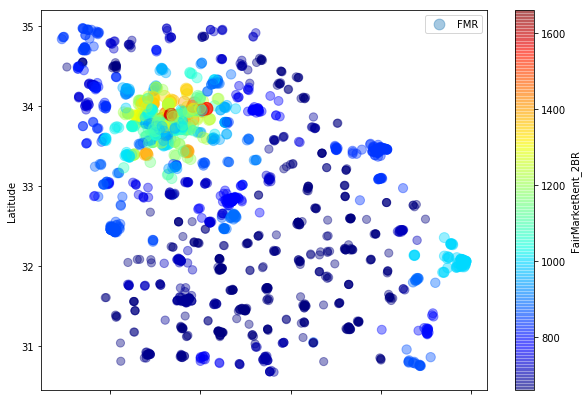

In [215]:
data.plot(kind="scatter", x="Longitude", y="Latitude",
    s=data['FairMarketRent_2BR']/10, label="FMR",
     c="FairMarketRent_2BR", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

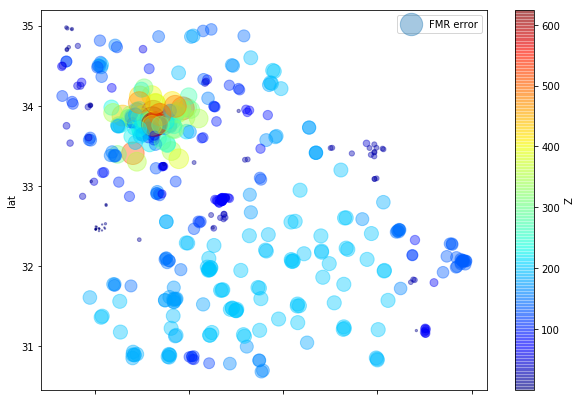

,lat,lng,Z
782,33.791000,-84.258300,23.500000
1619,34.696826,-85.294034,13.000000
963,32.464060,-83.945280,131.660000
1114,33.784858,-84.475496,255.400000
2113,31.501190,-82.849860,200.000000
1781,30.899060,-84.211700,189.660000
792,31.757860,-84.788160,143.160000
994,31.137360,-83.779720,200.000000
1027,33.712754,-84.390489,120.000000
1877,32.465110,-84.948670,2.000000


In [216]:
data_edited=pd.DataFrame({'lat':X_test["Latitude"],'lng': X_test["Longitude"],'Z':abs(y_test-predictions)[0]})

data_edited = data_edited.astype(float)
                         
data_edited.plot(kind="scatter", x='lng', y='lat',
    s=abs(y_test-predictions), label="FMR error",
     c='Z', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

display(data_edited)